<a href="https://colab.research.google.com/github/TKph/colab/blob/main/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%82%AF%E3%82%B9%E5%9B%9E%E5%B8%B0%E3%81%AB%E3%82%88%E3%82%8B%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# データの生成

---



In [ ]:
#今回はデータを生成する.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
np.random.seed(0)

mean = [10, 10] #meanなんだから平均だろ
cov = [[10, 3], [3,10]] #もちろんco-veriance
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T  #二次元ガウス分布を作成(データ数100)
true_false = np.random.rand(100) > 0.9  #10%がtrue <-- 会員継続顧客がtrue <-- こっちの分布は購入回数(x), 単価(y)が低い 
label1 = np.where(true_false, 1, 0) #データ生成??

mean = [20, 20]
cov = [[8, 4], [4,8]]
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T
true_false = np.random.rand(100) > 0.1  #90%がtrue --> こっちの分布はx,yともに高い
label2 = np.where(true_false, 1, 0)

X = (np.r_[x1, x2]) #配列の結合??
Y = (np.r_[y1, y2])
label = (np.r_[label1, label2])

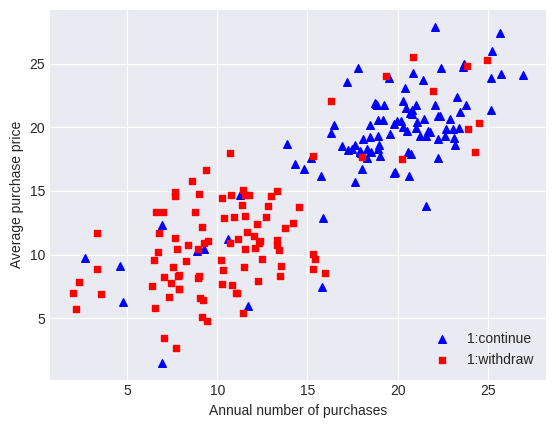

In [ ]:
plt.scatter(X[label == 1], Y[label == 1], marker = '^', s=30, c='blue', edgecolors=None, label='1:continue')
plt.scatter(X[label == 0], Y[label == 0], marker = ',', s=25, c='red', edgecolors=None, label='1:withdraw')

plt.xlabel('Annual number of purchases')
plt.ylabel('Average purchase price')
plt.legend(loc='lower right')
plt.show()



---

# ロジスティクス回帰の実装

---



In [ ]:
!pip install mlxtend  #閾値となる直線を描画してくれる??

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

TypeError: ignored

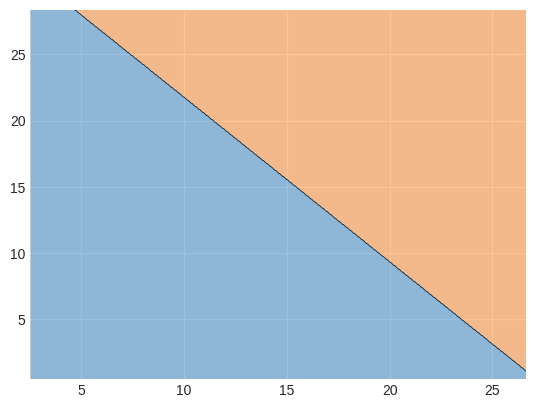

In [ ]:
Data = (np.c_[X, Y])
X_train, X_test, y_train, y_test = train_test_split(Data, label, random_state=0)

clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, clf = clf, res = 0.01, legend=2)

In [ ]:
print(f'Accuracy: {clf.score(X_test, y_test):.2f}')

label_prenew = clf.predict([[20,15]])
print(f'新たな顧客のラベルは{label_prenew}です。')

Accuracy: 0.88
新たな顧客のラベルは[1]です。




---

# 理論的な解説

---



ロジスティクス回帰では主に最尤推定を用いている. 以下, 今回の実装のように二次元を仮定.

z = p0 + p1 * X(購入回数) + p2 * Y(単価)  

z<0ならばラベル0(退会), z>0ならばラベル1(継続)

となる関数を定義.

if文を使わずに0～1に収めるため, ロジスティクス関数を使う.

σ(z) = 1 / 1+exp(-z)

σ(z) = 1 / 1+exp(- p0 - p1 * X - p2 * Y)

ここでσ(z)関数はちょうどラベルが1である確率を表している.つまり, ラベルが0である確率は1 - σ(z)で表せる. それらを同時に表したいので次のような関数(ベルヌーイ分布)を考える.

P(label = l) = {σ( p0 + p1 * X + p2 * Y)}^l + {1 - σ( p0 + p1 * X ; p2 * Y)}^1-l

この式はラベルが1なら, 第2項が0乗になるので第1項の数値だけが反映され, ラベルが0なら同様にして第2項だけが反映される.

さて, さいころを4回振って1,2,5,6が出る確率は 1/6 ^^4であるように, ラベルが1,0,0,1である確率は掛け算で表される. データ数をNとするとその同時確率は

L(p0,p1,p2) = Π P(label = label_n)

ここから最尤推定. まずlogをとり、最大化すればよい. 

L(p0,p1,p2) = Σ logP(label = label_n)

解析的には解けないので勾配法を使う. scikit-learnのデフォルトでは共役勾配法. p0,p1,p2(パラメータ)で偏微分して傾きを求め, 上昇方向に少しずつ修正していく. βは学習率.

p0(new) = p0(old) - β * L(p0,p1,p2)のp0での偏微分


